# Time series analysis



In [1]:
%pip install -q pandas matplotlib statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'

df = pd.read_csv('data/a10.csv', index_col='date', parse_dates=['date'])
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [3]:
df.index.freq='MS'
df.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq='MS')

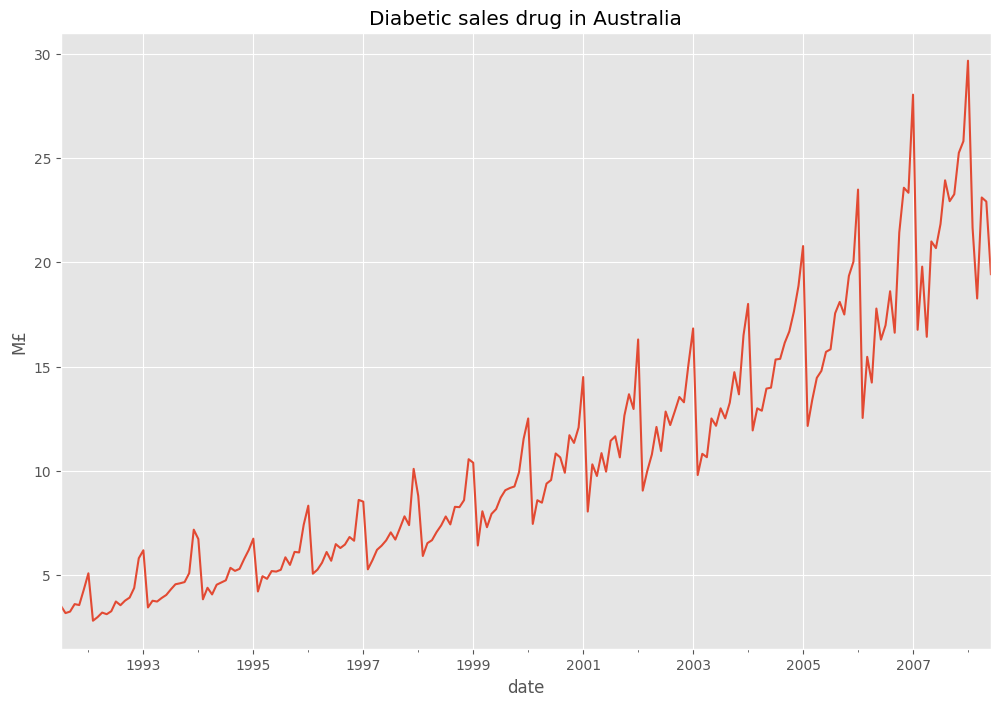

In [4]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)
df.plot(title='Diabetic sales drug in Australia', legend=False, ylabel='M£');

## Decomposition

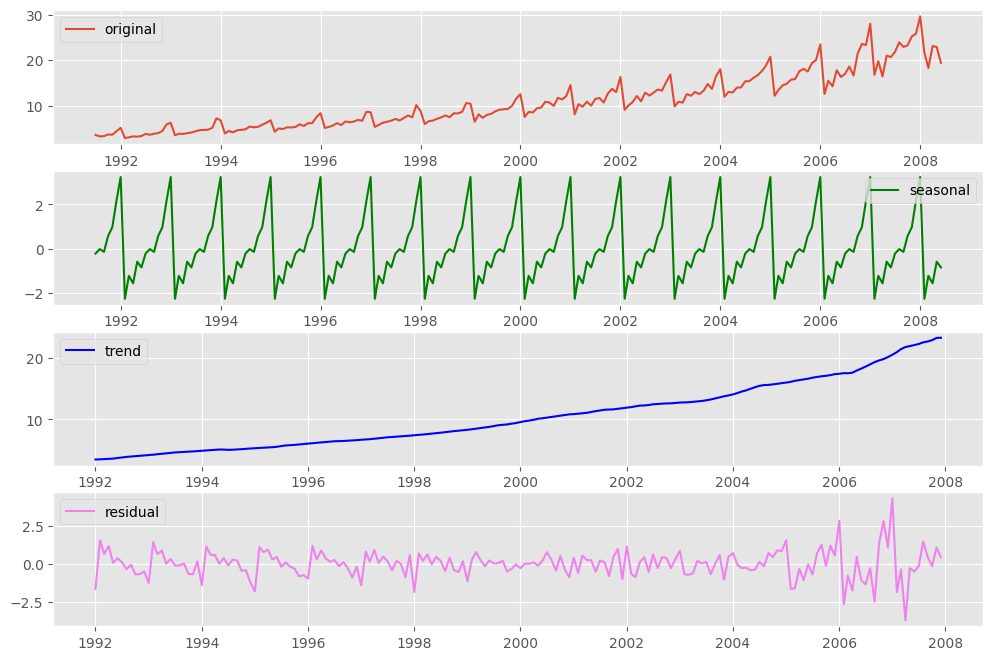

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec = seasonal_decompose(df)

plt.subplot(411)
plt.plot(df, label='original') 
plt.legend()

plt.subplot(412)
plt.plot(dec.seasonal, label='seasonal', color='green') 
plt.legend()

plt.subplot(413)
plt.plot(dec.trend, label='trend', color='blue') 
plt.legend()

plt.subplot(414)
plt.plot(dec.resid, label='residual', color='violet') 
plt.legend()

plt.show()

## Autocorrelation

In [10]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df)
adf 

(np.float64(3.14518568930673),
 1.0,
 15,
 188,
 {'1%': np.float64(-3.465620397124192),
  '5%': np.float64(-2.8770397560752436),
  '10%': np.float64(-2.5750324547306476)},
 np.float64(549.6705685364174))

In [11]:
if adf[0] < adf[4]['5%']:
    print('process is stationary')
else:
    print('process not stationary')

process not stationary


In [12]:
import numpy as np

adfuller(np.random.randn(100))

(np.float64(-4.050035197658143),
 np.float64(0.0011700236271660423),
 4,
 95,
 {'1%': np.float64(-3.5011373281819504),
  '5%': np.float64(-2.8924800524857854),
  '10%': np.float64(-2.5832749307479226)},
 np.float64(231.3748574240625))

## Remove trend

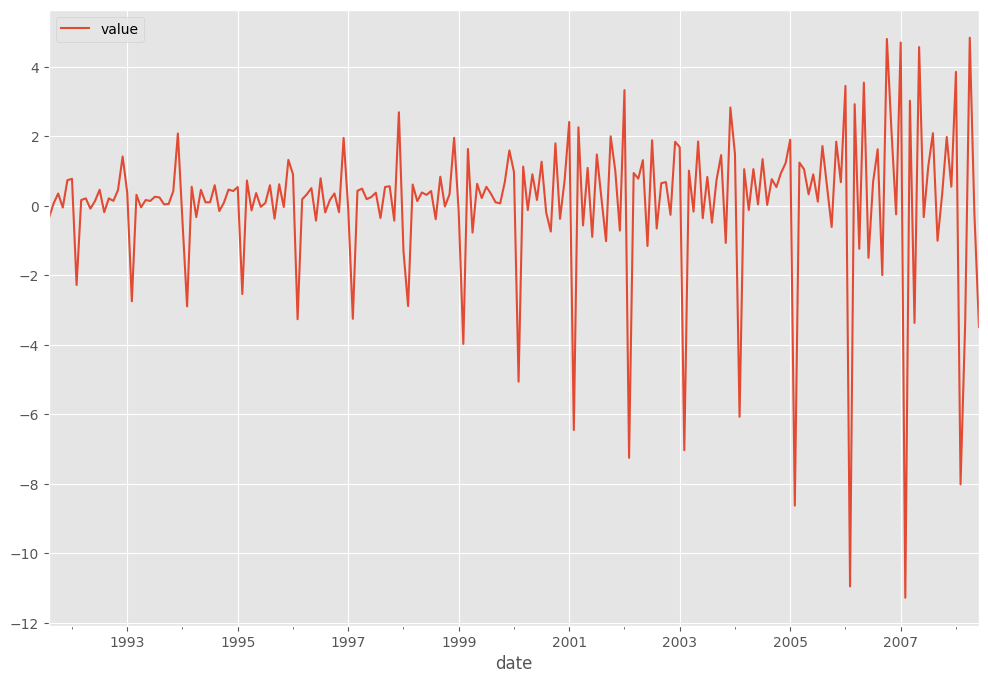

In [15]:
df_diff = df - df.shift()
df_diff.dropna(inplace=True)
df_diff.plot();

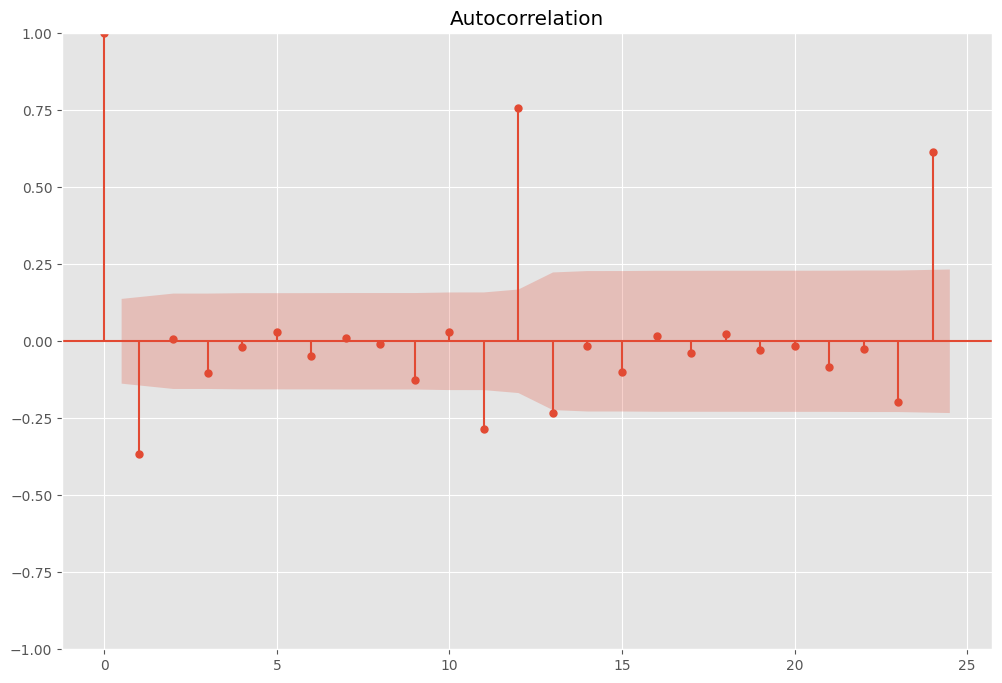

In [20]:
import statsmodels.graphics.tsaplots as sm

sm.plot_acf(df_diff);

## Predict future sales

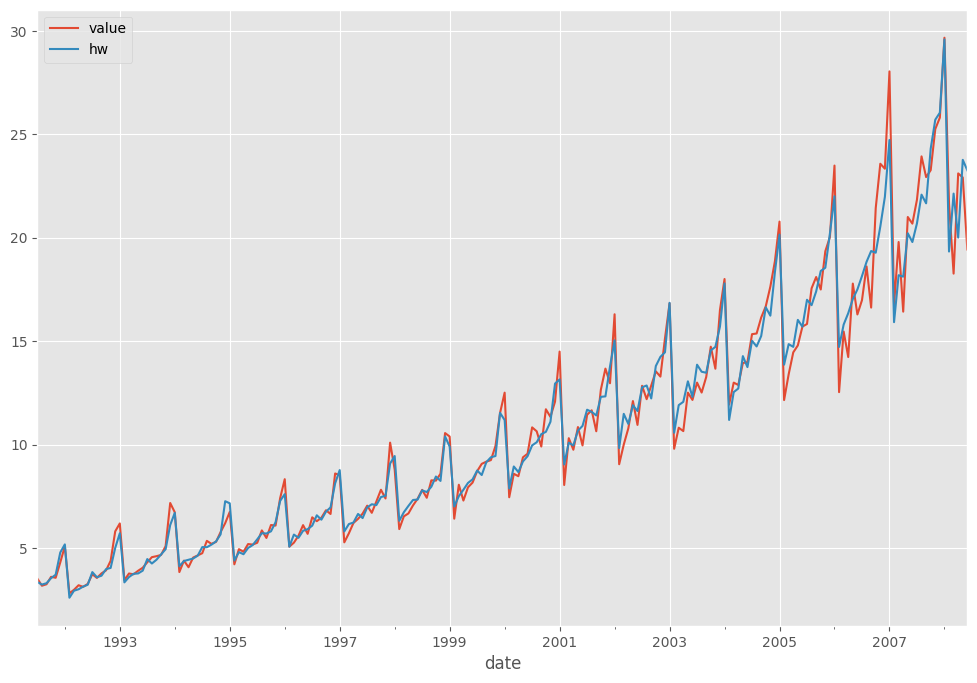

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hwes = df.copy()
model = ExponentialSmoothing(hwes, trend='mul', seasonal='add').fit()
hwes['hw'] = model.fittedvalues
hwes.plot();


In [33]:
model.summary()

Dep. Variable:,value,No. Observations:,204
Model:,ExponentialSmoothing,SSE,163.998
Optimized:,True,AIC,-12.526
Trend:,Multiplicative,BIC,40.564
Seasonal:,Additive,AICC,-8.828
Seasonal Periods:,12,Date:,"Wed, 20 Nov 2024"
Box-Cox:,False,Time:,16:50:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0979395,alpha,True
smoothing_trend,0.000000,beta,True


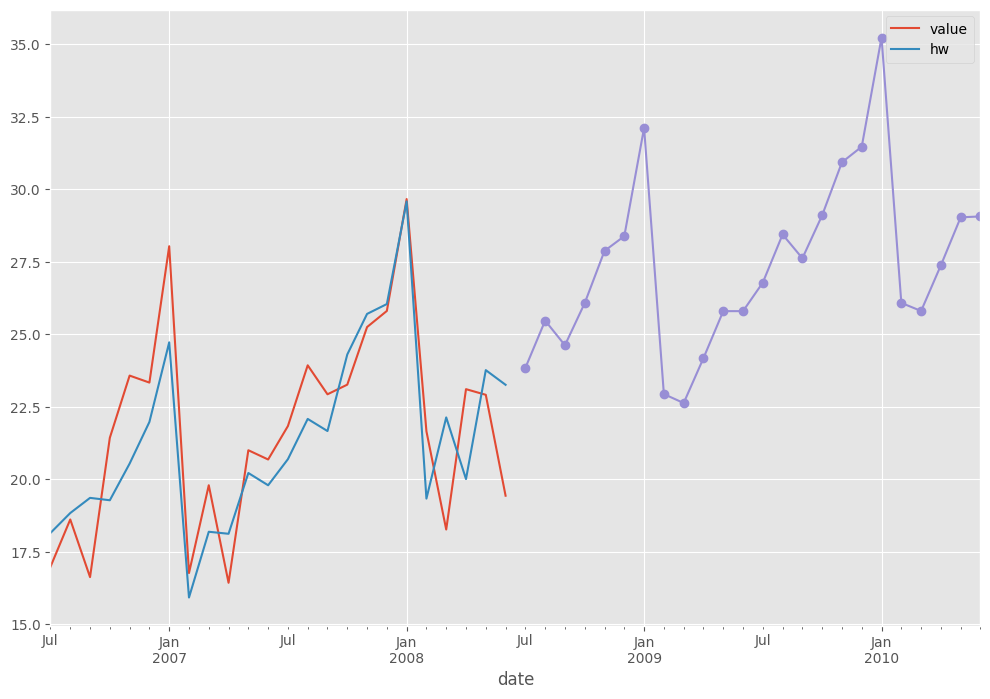

In [37]:
predict = model.forecast(24)

hwes[-24:].plot()
predict.plot(marker='o');

In [38]:
predict

2008-07-01    23.840170
2008-08-01    25.472075
2008-09-01    24.621841
2008-10-01    26.077347
2008-11-01    27.876945
2008-12-01    28.385895
2009-01-01    32.122210
2009-02-01    22.937903
2009-03-01    22.628707
2009-04-01    24.176098
2009-05-01    25.798718
2009-06-01    25.799166
2009-07-01    26.784140
2009-08-01    28.444062
2009-09-01    27.622111
2009-10-01    29.106169
2009-11-01    30.934591
2009-12-01    31.472639
2010-01-01    35.238328
2010-02-01    26.083677
2010-03-01    25.804417
2010-04-01    27.382029
2010-05-01    29.035158
2010-06-01    29.066406
Freq: MS, dtype: float64

In [44]:
from statsmodels.tsa.arima.model import ARIMA

model2 = ARIMA(df, trend='t').fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  204
Model:                          ARIMA   Log Likelihood                -462.200
Date:                Wed, 20 Nov 2024   AIC                            928.399
Time:                        16:59:50   BIC                            935.035
Sample:                    07-01-1991   HQIC                           931.084
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1016      0.001     77.443      0.000       0.099       0.104
sigma2         5.4384      0.486     11.189      0.000       4.486       6.391
===================================================================================
Ljung-Box (L1) (Q):                  58.13   Jarque-Bera (JB):                22.43
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.42   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

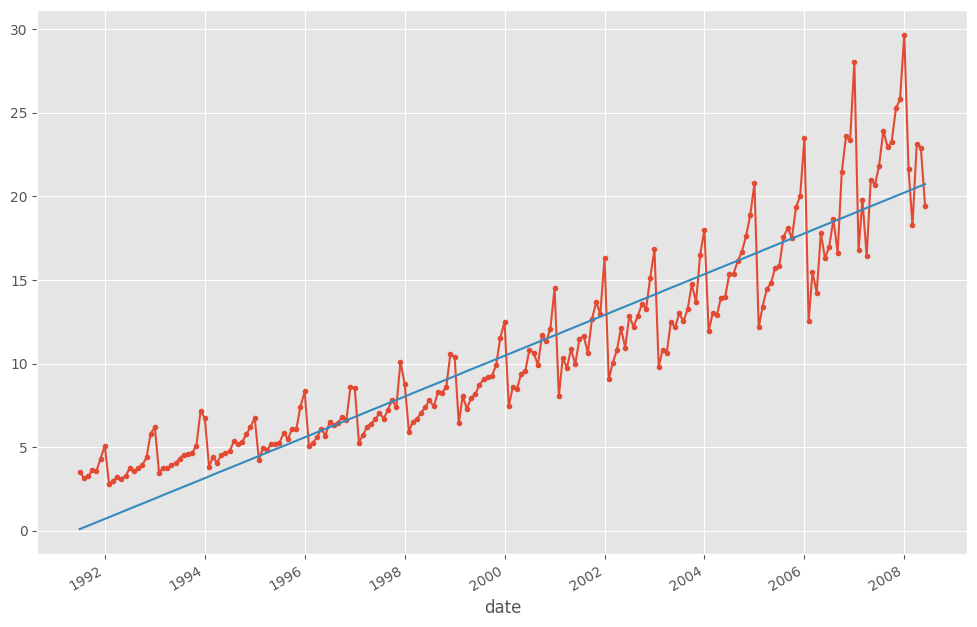

In [48]:
plt.plot(df, marker='.')
model2.fittedvalues.plot();